# 1. Linear Regression

***Importing necessary python libraries***

In [1]:
import pandas as pd
import numpy as np

***Reading the contents of a CSV file named "temp.csv" into a dataframe df,***

In [2]:
df = pd.read_csv("temp.csv")

***Shows a tuple with row and column size***

In [3]:
df.shape


(9568, 5)

***Returns the first few rows of the DataFrame df***

In [4]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


***Computes the sum of missing values in each column in df***

In [5]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

***making new dataframe x by dropping the column named "PE" from the original dataframe df***

In [6]:
x = df.drop(columns= "PE")
x

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


***The dropped column is been called into y dataframe***

In [7]:
y = df["PE"]
y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: PE, Length: 9568, dtype: float64

***Finding positive correlation of each column to check the relation between columns***

In [8]:
ndf = df.select_dtypes(include=['float64', 'int64'])
 
# Compute the correlation matrix
correlation_matrix = ndf.corr()
 
# Extract the correlation values with the target variable (e.g., 'price')
corr = correlation_matrix['PE']
 
# Identify variables with positive correlation
positive_correlation = corr[corr > 0]
 
# Display the variables with positive correlation
print("Variables with Positive Correlation:")
print(positive_correlation)

Variables with Positive Correlation:
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64


***Importing necessary libraries for regression training, prediction and for finding accuracy***

In [9]:
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


***splitting the data as train and test for representing the features and target variables for testing, with `test_size=0.3` indicating that 30% of the data is allocated for testing and `random_state=0` for reproducibility.***

In [10]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

***This line initializes an instance of the Linear Regression model from scikit-learn.***

In [11]:
lr = LinearRegression()

***This line fits the linear regression model to the training data `x_train` and corresponding target values `y_train`, allowing the model to learn the relationship between the features and the target variable.***

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

***This line predicts the target variable values (y_pred) for the given test features (x_test) using the trained model lr***

In [13]:
y_pred = lr.predict(x_test)
y_pred

array([433.33259502, 448.37969342, 445.91247797, ..., 444.05809103,
       459.34745691, 472.91532015])

***It represents the intercept term (bias) of the model, which indicates the value of the predicted target variable when all predictor variables are set to zero.***

In [14]:
c = lr.intercept_
c

448.5306714055783

***It represents the coefficients of the model, indicating the change in the predicted target variable for a one-unit change in each predictor variable while holding other variables constant.***

In [15]:
m = lr.coef_
m

array([-1.9797936 , -0.23300225,  0.06812315, -0.15839461])

***This code creates a scatter plot of actual vs. predicted values (`y_test` vs. `y_pred`), adds a regression line using Seaborn's `regplot`, and displays the plot with legend.***

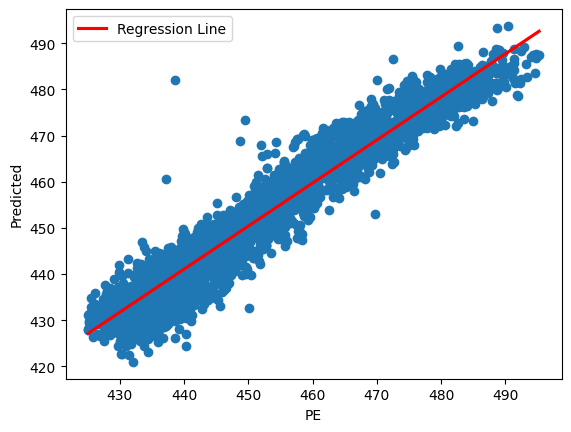

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
sns.regplot(x=y_test,y= y_pred, scatter=False, color='red', label='Regression Line')

plt.legend()
plt.show()


***Importing library for  predicting meansquare error and r squared score to predict the accuracy***

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

***R squared accuracy score for the model***

In [18]:

r_squared = r2_score(y_test, y_pred)
r_squared


0.9289374661293961

***Mean Squared Error score for the model***

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  20.60318130208777


***Mean Absolute Error score for the model***

In [20]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  3.6145667311908363
